### Resources:
* [D-separation steps](http://web.mit.edu/jmn/www/6.034/d-separation.pdf)
* [bnlearn datasets](https://www.bnlearn.com/bnrepository/)
* [Daggity paper](https://academic.oup.com/ije/article/45/6/1887/2907796)
* [Milestone](https://gitlab.pnnl.gov/y0-scuc/y0-archive/-/milestones/4)
* [pgmpy](https://github.com/pgmpy/pgmpy/blob/dev/examples/Creating%20a%20Discrete%20Bayesian%20Network.ipynb)  -- get_independencies

### TODO:
* Break into module, write proper unit tests
* What about conditional independencies?  Currently only covers independencies.  
   * Can I just enumerate tripples and check 'A,B given=["C"]'?  
   * Would then check combinations-pairs + combinations-givens 
   * Up to how many givens do you check?

In [1]:
from y0.algorithm import falsification
from y0.graph import ADMG
import y0

import networkx as nx
import pandas as pd

import seaborn as sns
from itertools import chain
from tqdm import tqdm
%matplotlib inline

%load_ext autoreload
%autoreload 2

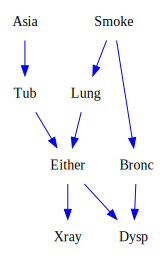

In [2]:
edges = [("Asia", "Tub"), 
         ("Smoke", "Lung"), ("Smoke", "Bronc"),
         ("Tub", "Either"),
         ("Lung", "Either"),
         ("Either", "Xray"), ("Either", "Dysp"),
         ("Bronc", "Dysp")]

#asia_G = nx.DiGraph(edges)
asia_G = ADMG()
for v in chain(*edges): asia_G.add_vertex(v)
for e in edges: asia_G.add_diedge(*e)
    
asia_df = pd.read_csv("asia.csv", index_col=0)\
            .replace({"yes":1, "no":-1})

asia_G.draw()


In [4]:
issues = falsification.falsifications(asia_G, asia_df, max_given=2)
issues

Series([], dtype: float64)+evidence

In [5]:
issues.evidence

,left,right,given,chi^2,p,dof,flagged
2,Asia,Xray,"(Either,)",4.268355,0.118342,2,False
8,Asia,Dysp,"(Tub,)",1.498154,0.472803,2,False
9,Bronc,Lung,"(Smoke,)",3.477138,0.175772,2,False
12,Bronc,Xray,"(Either,)",0.206653,0.901833,2,False
13,Dysp,Xray,"(Either,)",0.656339,0.720241,2,False
15,Smoke,Xray,"(Either,)",0.487209,0.783798,2,False
0,Lung,Xray,"(Either,)",0.381573,0.536763,1,False
1,Asia,Either,"(Tub,)",0.300140,0.583795,1,False
3,Either,Smoke,"(Lung,)",0.024627,0.875300,1,False
4,Lung,Tub,(),0.129525,0.718925,1,False


In [6]:
# Should be issues (Lung, Either) AT LEAST.
#.  Seeing issues (Lung, Xray) as well.  Is that all? 
# TODO: Check d-separations by hand...
import copy
asia_G2 = copy.deepcopy(asia_G)
asia_G2.delete_diedge("Lung", "Either")
issues = falsification.falsifications(asia_G2, asia_df)
issues

8      (Dysp, Lung, (Bronc,))
10    (Dysp, Smoke, (Bronc,))
1         (Bronc, Either, ())
6           (Bronc, Xray, ())
11         (Either, Lung, ())
13        (Either, Smoke, ())
16          (Smoke, Xray, ())
18           (Lung, Xray, ())
dtype: object+evidence